## TITLE

Subheading

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as ss
%matplotlib inline
pd.set_option('display.max_rows', 2500)
pd.set_option('display.max_columns', None)

Introduce plot

In [2]:
df = pd.read_csv("owid-covid-data.csv")
df1 = df[["location","date","total_cases_per_million","new_cases_per_million","new_cases_smoothed_per_million"]]

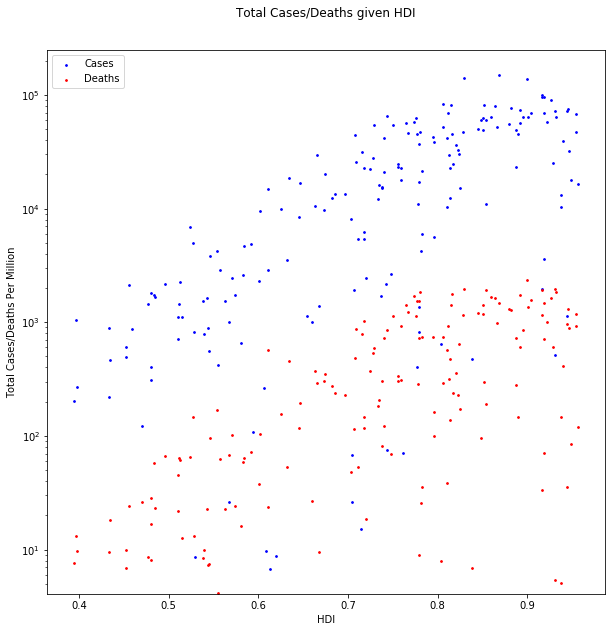

In [7]:
df2 = df[["iso_code","location","date","total_cases_per_million","total_cases","total_deaths","total_deaths_per_million","human_development_index","population"]]
dfHDI = df2.loc[df1['date'] == "2021-03-23"]
dfHDI = dfHDI.drop([798,4023,23782,24208,50944,52164,64162,75743])
dfHDI = dfHDI.reset_index()
x = dfHDI['human_development_index']
y1 = dfHDI['total_cases_per_million']
y2 = dfHDI['total_deaths_per_million']
fig1 = plt.figure(figsize = (10, 10))
ax1 = fig1.add_subplot()
plt.scatter(x, y1, s=3, alpha=1, c="b")
plt.scatter(x, y2, s=3, alpha=1, c="r")
ax1.set_yscale('log')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.ylabel("Total Cases/Deaths Per Million")
plt.xlabel("HDI")
plt.title("Total Cases/Deaths given HDI", fontsize = 12, y = 1.05)
plt.legend((("Cases"), ("Deaths")), loc = "upper left", fontsize = 10)
plt.show()

Explain flaws and give an overview on how you will challenge them. Add correlation values to justify why you're doing this.

In [8]:
dfHDI['pop% Cases'] = dfHDI['total_cases']*100/dfHDI['population']
dfHDI['pop% Deaths'] = dfHDI['total_deaths']*100/dfHDI['population']
dfHDI[['location','pop% Cases','pop% Deaths']]

,location,pop% Cases,pop% Deaths
0,Afghanistan,0.144309,0.006335
1,Albania,4.234033,0.074918
2,Algeria,0.265328,0.006992
3,Andorra,15.001618,0.146250
4,Angola,0.066250,0.001613
5,Antigua and Barbuda,1.102851,0.028592
6,Argentina,5.003956,0.121301
7,Armenia,6.243854,0.114200
8,Australia,0.114593,0.003565
9,Austria,5.773450,0.101272


In [19]:
BMI = pd.read_csv("NCD_RisC_Lancet_2017_BMI_age_standardised_country.csv", encoding= 'unicode_escape')
BMI = BMI.loc[BMI['Year'] == 2016]
BMIMen = BMI.loc[BMI['Sex'] == 'Men']
BMIMen = BMIMen.reset_index()
BMIMen = BMIMen[["ISO", "Mean BMI", "Prevalence of BMI>=30 kg/m² (obesity)", "Prevalence of BMI>=35 kg/m² (severe obesity)"]]

In [18]:
mergedDF = dfHDI
mergedDF = mergedDF.merge(BMIMen, left_on = "iso_code", right_on = 'ISO')

,index,iso_code,location,date,total_cases_per_million,total_cases,total_deaths,total_deaths_per_million,human_development_index,population,pop% Cases,pop% Deaths,ISO,Mean BMI,Prevalence of BMI>=30 kg/m² (obesity),Prevalence of BMI>=35 kg/m² (severe obesity)
0,393,AFG,Afghanistan,2021-03-23,1443.087,56177.0,2466.0,63.347,0.511,3.892834e+07,0.144309,0.006335,AFG,22.682456,0.033603,0.003314
1,1191,ALB,Albania,2021-03-23,42340.329,121847.0,2156.0,749.183,0.795,2.877800e+06,4.234033,0.074918,ALB,27.174471,0.223735,0.045036
2,1584,DZA,Algeria,2021-03-23,2653.278,116349.0,3066.0,69.919,0.748,4.385104e+07,0.265328,0.006992,DZA,24.865386,0.206662,0.042840
3,1971,AND,Andorra,2021-03-23,150016.178,11591.0,113.0,1462.499,0.868,7.726500e+04,15.001618,0.146250,AND,27.478395,0.267498,0.068565
4,2340,AGO,Angola,2021-03-23,662.503,21774.0,530.0,16.126,0.581,3.286627e+07,0.066250,0.001613,AGO,22.436538,0.042276,0.007148
5,2760,ATG,Antigua and Barbuda,2021-03-23,11028.511,1080.0,28.0,285.924,0.778,9.792800e+04,1.102851,0.028592,ATG,25.825696,0.120878,0.029529
6,3208,ARG,Argentina,2021-03-23,50039.565,2261577.0,54823.0,1213.012,0.845,4.519578e+07,5.003956,0.121301,ARG,28.017682,0.282313,0.076017
7,3596,ARM,Armenia,2021-03-23,62438.538,185020.0,3384.0,1141.996,0.776,2.963234e+06,6.243854,0.114200,ARM,25.743889,0.177511,0.039063
8,4446,AUS,Australia,2021-03-23,1145.927,29221.0,909.0,35.647,0.944,2.549988e+07,0.114593,0.003565,AUS,27.718491,0.305678,0.099114
9,4839,AUT,Austria,2021-03-23,57734.500,519980.0,9121.0,1012.724,0.922,9.006400e+06,5.773450,0.101272,AUT,26.672887,0.226483,0.060438


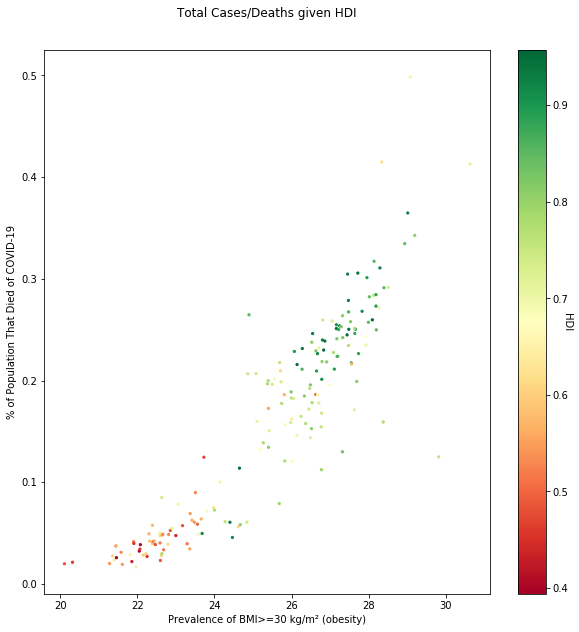

In [46]:
x = mergedDF['Mean BMI']
y = mergedDF['Prevalence of BMI>=30 kg/m² (obesity)']
fig3 = plt.figure(figsize = (10, 10))
ax3 = fig3.add_subplot()
plt.scatter(x, y, s = 5, alpha = 1, c = mergedDF.human_development_index, cmap = 'RdYlGn')
cbar = plt.colorbar()
cbar.ax.set_ylabel('HDI', rotation=270)
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.ylabel("% of Population That Died of COVID-19")
plt.xlabel("Prevalence of BMI>=30 kg/m² (obesity)")
plt.title("Total Cases/Deaths given HDI", fontsize = 12, y = 1.05)
plt.show()